<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [73]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [74]:
# Read CSV
house_csv = "data/Sacramento_transactions.csv"
house = pd.read_csv(house_csv)

# Print Head
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [75]:
# Copy code cleaning from Lab 4.1.1
# Some 0 values for sq_ft, which should be impossible for a property
# Change 0 values to NaN
house.sq__ft.replace(0, np.nan, inplace=True)

# Replace NaN with new mean (mean has been altered by removal of 0 values)
house.sq__ft.fillna(house.sq__ft.mean(), inplace=True)

# No null values. Convert sale_date to datetime
# import datetime
import datetime

# Convert
house.sale_date = pd.to_datetime(house.sale_date)

# Plenty of statistical outliers as shown above - 
# Remove from beds and baths, keep others as they may be valuable

# Create function to drop using standard deviation and the mean:
def outlierdrop(df,colname):
    # Assign upper and lower limits
    upper_limit= df[colname].mean () + 3 *df[colname].std ()
    lower_limit = df[colname].mean () - 3 *df[colname].std ()
    new_df = df[(df[colname] < upper_limit) &
    (df[colname] > lower_limit)]
    return new_df

# Apply function to required columns
house = outlierdrop(house, 'beds')
house = outlierdrop(house, 'baths')

C:\Users\jacks\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


<AxesSubplot:>

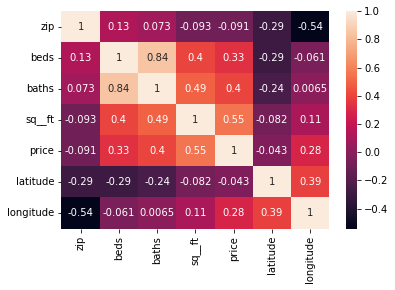

In [76]:
# Generate correlation heatmap
sns.heatmap(house.corr(), annot=True)

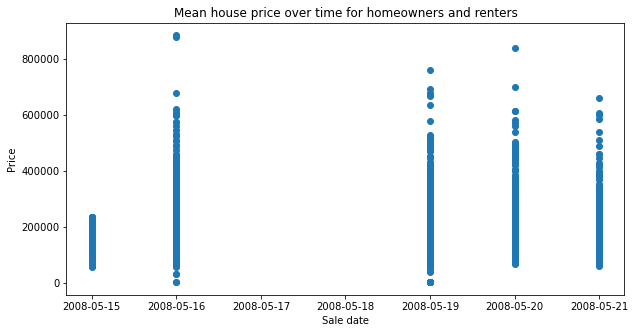

In [77]:
# Plot on same axis, label appropriately
_ = plt.figure(figsize=(10,5))
_ = plt.scatter(x=house.sale_date, y=house.price)
_ = plt.title('Mean house price over time for homeowners and renters')
_ = plt.xlabel('Sale date')
_ = plt.ylabel('Price')

### From 4.1.1:
Longitude/latitude/zip all correlated, this is to be expected.
<br><br>
Price has no significantly largest correlative, but is correlated slightly with baths, sq_ft, beds, and longitude; in that order.
<br><br>
Beds, baths, and sq_ft are all intercorrelated between 0.67 - 0.84, reducing usefulness of using all of them for multivariate regression.
<br><br>
For house type, multi-family houses and residential houses are statistically indistinguishable. As far as type is concerned, the only thing that matters is Condo or not Condo.

### See 4.1.1 for more EDA

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [78]:
# ANSWER
# Target variable is price

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [79]:
# ANSWER
# Baths - highest correlation with price
# Beds - second highest correlation with price
# Sq_ft is to be used - third highest correlation
# Longitude - fourth highest correlation
# Property type - distinct difference between condos and other properties

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [80]:
# ANSWER
# See correlation matrix above
# Best predictor is sq_ft as it has the highest correlation with house data out of the continuous variables, 
# and high intercorrelation with two other variables.

#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [81]:
# Import required libraries
from sklearn.linear_model import LinearRegression

# Create model
model1 = LinearRegression()

##### 2.4.1 Fit predictor and target variables using linear regression 

In [82]:
# ANSWER
# Create X and y datasets
X = house[['sq__ft']]
y = house['price']

# Fit model to data
model1.fit(X, y)

LinearRegression()

##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [83]:
# ANSWER
r_score = model1.score(X, y)

print('The R-squared value is ', r_score)

The R-squared value is  0.3030920716283143


### 3. Splitting Data

In [84]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [85]:
# ANSWER
## Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state=42)

#### 3.2 Check Shape, Sample of Test Train Data

In [86]:
# ANSWER
## Check training/test data
print(X_train.shape)
print(X_train.sample())

print(y_test.shape)
print(y_test.sample())

(654, 1)
    sq__ft
68  2162.0
(328,)
743    250000
Name: price, dtype: int64


#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [87]:
# ANSWER
# New model
model2 = LinearRegression()

# Fit
model2.fit(X_train, y_train)

LinearRegression()

In [88]:
# ANSWER
# Find R-squared score
r_score2 = model1.score(X_test, y_test)

print('The R-squared value is ', r_score2)

The R-squared value is  0.29340923644298156


### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [89]:
# ANSWER
predicted_price = float(model2.predict([[1204]]))

print('The predicted home price is {0} dollars'.format(predicted_price))

The predicted home price is 181873.86167517674 dollars


#### Find the error

In [93]:
# Single value error:
# Actual price:
actual_price = house.price.loc[house.street=='1140 EDMONTON DR'].values[0]
single_error = abs(predicted_price - actual_price)
print('Single error is ', single_error)

# Mean squared error of model based on test data
# Find predicted values
y_predict = model2.predict(X_test)

# Find error
MSE = (((y_predict - y_test)**2).sum())/len(y_test)

print("The Mean Squared Error for the model on the test data is", MSE)
print(y_predict - y_test)
print((y_predict - y_test)**2)


Single error is  7623.86167517674
The Mean Squared Error for the model on the test data is 15464397676.746647
812   -117234.673291
803     18933.492400
864   -282792.872858
500      7124.453799
67       7825.409843
           ...      
579    227868.326709
460     99269.737450
358     43897.822739
174     58857.709949
126   -106734.673291
Name: price, Length: 328, dtype: float64
812    1.374397e+10
803    3.584771e+08
864    7.997181e+10
500    5.075784e+07
67     6.123704e+07
           ...     
579    5.192397e+10
460    9.854481e+09
358    1.927019e+09
174    3.464230e+09
126    1.139229e+10
Name: price, Length: 328, dtype: float64




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



